In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

# Generación de datos

In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    # Se observa que la matriz de covarianza es diagonal en el caso de X2, lo cual representa una gaussiana independiente
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del Dataset

Dos tipos de datasets:
- generate_gaussians_distributions: Generado con dos gaussianas
- generate_elipse_data: Generado con distribución uniforme en el cuadrado [-1, 1], [-1, 1] y recortando con una elipse en el centro

Descomentar/comentar las lineas correspondientes para seleccionar uno u otro dataset

In [6]:
X, y = generate_gaussians_distributions()
#X, y = generate_elipse_data()

# Graficamos

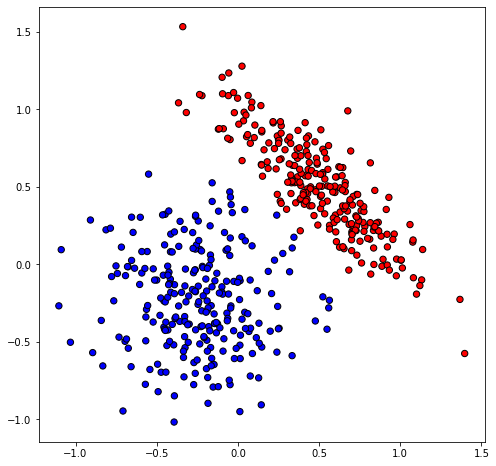

In [7]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

**Nota: Los puntos rojos corresponden a la clase 1 y los azules a la clase 2**

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing=1e-09 (Ambos datasets)
- priors=None, var_smoothing=0.2 (para generate_elipse_data) var_smoothing=1 (para generate_gaussians_distributions) 
- priors=[0.5, 0.5] (para generate_elipse_data) priors=[0.7, 0.3] (para generate_gaussians_distributions), var_smoothing=1e-09 

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True (Ambos modelos)
- Cambio los parámetros como quiera y verifique si ocurre lo esperado

In [19]:
#model = GaussianNB(priors=None, var_smoothing=1e-09)
model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)

In [20]:
# Entrenamiento del modelo
model.fit(X,y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [21]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

In [22]:
if type(model)==QuadraticDiscriminantAnalysis:
    print(model.classes_) 
    prior1, prior2 =  model.priors_
    mu1, mu2 = model.means_
    sigma1, sigma2 = model.covariance_

[0. 1.]


C:\Users\jvidela\dev\diplo-dl\02- Machine Learning\Laboratorio 01\lab_helper.py:28: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


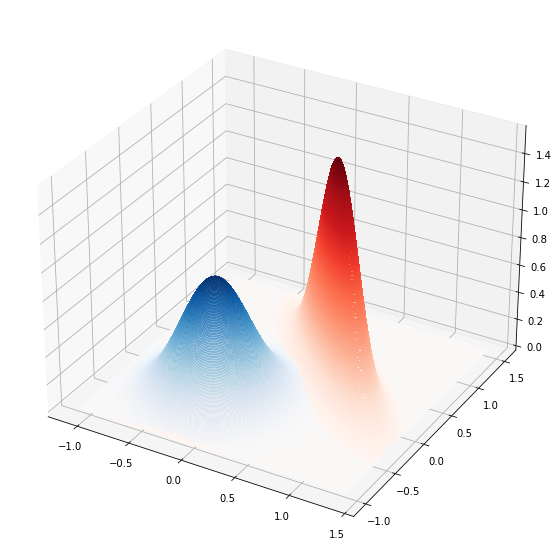

In [23]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

In [17]:
sigma1

array([0.09812204, 0.09927783])

In [18]:
sigma2

array([0.08749664, 0.10326828])

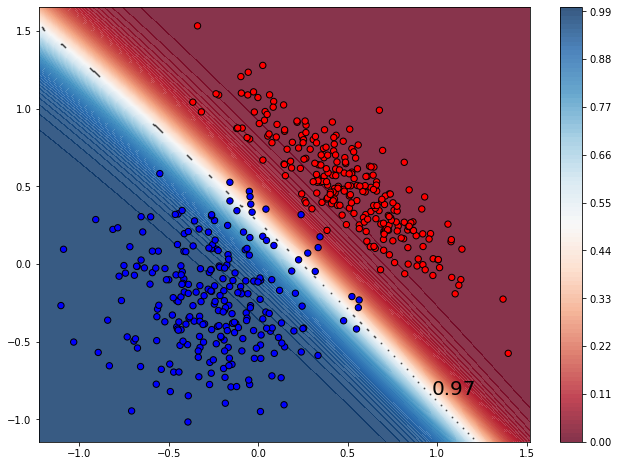

In [16]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

## Resolución de consignas

### Pregunta 05

In [96]:
sigma1

array([0.09812204, 0.09927783])

Con var_smoothing = 1: 
- Las varianzas son iguales a [0.33374559, 0.33490137] para la clase 1 y [0.32312018, 0.33889183] para la clase 2
- El accuracy es de 0.972

Con var_smoothing = 1e-09:
- Las varianzas son iguales a [0.09812204, 0.09927783] para la clase 1 y  [0.08749664, 0.10326828] para la clase 2
- El accuracy es de 0.97

Es decir, al aumentar el smoothing, aumenta la varianza de las Gaussianas estimadas. Además, el modelo se vuelve más inseguro (aumenta el área donde la probabilidad es cercana a 0.5)